# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def dice():
    i=0
    rolls=[]
    while i<10:
        rolls.append(random.choice(range(1,7)))
        i+=1
    return pd.DataFrame(rolls,columns=['rolls'])
dices=dice()

In [4]:
dices

,rolls
0,1
1,4
2,4
3,6
4,1
5,3
6,5
7,4
8,2
9,1


#### 2.- Plot the results sorted by value.

array([[<AxesSubplot:title={'center':'rolls'}>]], dtype=object)

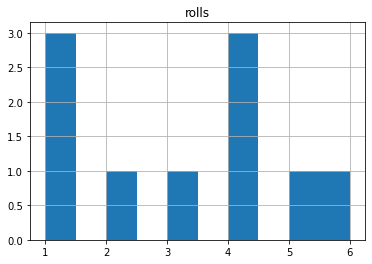

In [5]:
# your code here
dices.sort_values(by='rolls',ascending=False, inplace=True)
dices.hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:>

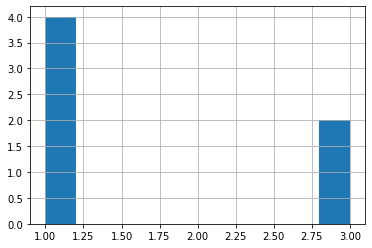

In [6]:
# your code here
freq_dist=dices.groupby(['rolls']).agg({"rolls":'count'})
freq_dist['rolls'].hist()


In [7]:
"""
your comments here
A histogram is able to plot a dataset based on its frequency, achieving the same effect as a frequency distribution in a visual form (values on the x and frequency on the right. the second plot is using the frequency as an x-axis
showing the repitions of each of the frequencies 
"""

'\nyour comments here\nA histogram is able to plot a dataset based on its frequency, achieving the same effect as a frequency distribution in a visual form (values on the x and frequency on the right. the second plot is using the frequency as an x-axis\nshowing the repitions of each of the frequencies \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def meancalc (rolls):
    return rolls.sum()/len(rolls)


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
rol=dices.groupby(['rolls']).agg({'rolls':'count'})['rolls'].values
meancalc(rol)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
result=dices['rolls'].values
def med(rolls):
    rolls=list(rolls)
    if len(rolls)%2 ==1:
        while len(rolls)>1:
            rolls.pop(0)
            rolls.pop(len(rolls)-1)
        else:
            return rolls
    else:
        while len(rolls)>2:
            rolls.pop(0)
            rolls.pop(len(rolls)-1)
        else:
            medi=(rolls[0]+rolls[1])/2
            return medi

med(result)


3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def quar(rolls):
    quart1 = rolls.quantile(.20)
    quart2 = rolls.quantile(.40)
    quart3 = rolls.quantile(.60)
    quart4 = rolls.quantile(.80)
    return quart1,quart2,quart3, quart4
quar(dices)

(rolls    1.0
 Name: 0.2, dtype: float64,
 rolls    2.6
 Name: 0.4, dtype: float64,
 rolls    4.0
 Name: 0.6, dtype: float64,
 rolls    4.2
 Name: 0.8, dtype: float64)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [29]:
# your code here
data=pd.read_csv('C:/Users/Francesco M/Documents/IronHack Syllabus/Labs/Descriptive-Stats/data/roll_the_dice_hundred.csv', index_col=False)
data=data[['roll','value']]
ord_data=data.sort_values(by='value')
print(ord_data)
ord_data['value'].value_counts()

    roll  value
0      0      1
47    47      1
56    56      1
9      9      1
73    73      1
..   ...    ...
17    17      6
11    11      6
24    24      6
21    21      6
99    99      6

[100 rows x 2 columns]


6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

we see quite a large spread in values leaning more towards 6 and 4

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [30]:
# your code here
meancalc(ord_data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [31]:
# your code here
data.groupby(['value']).agg({'value':'count'})

,value
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

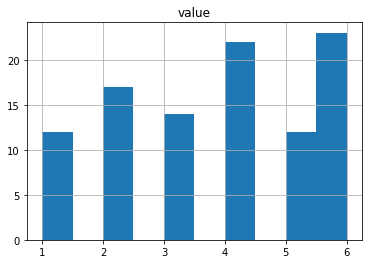

In [33]:
# your code here
data[['value']].hist()

the list of values leans more towards the upper end of the histogram (as seen by the two highest frequencies on the right side). This would suggest a mean value higher than the half way point of the values(in this case 3)

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

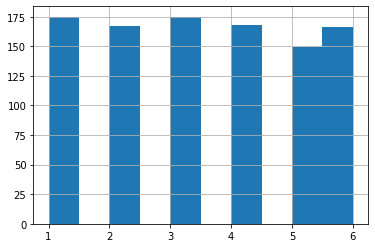

In [35]:
# your code here
data=pd.read_csv('C:/Users/Francesco M/Documents/IronHack Syllabus/Labs/Descriptive-Stats/data/roll_the_dice_thousand.csv', index_col=False)
data=data[['roll','value']]
data['value'].hist()


The histogram has somewhat evened out since the probability of each value appearing is equal and independant. If the trials were to increase the histogram would eventually have 6 equally sized bars

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

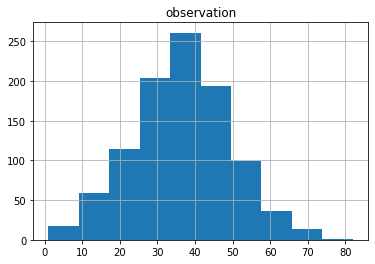

In [37]:
# your code here
data=pd.read_csv('C:/Users/Francesco M/Documents/IronHack Syllabus/Labs/Descriptive-Stats/data/ages_population.csv', index_col=False)
data.hist()

the average would probably lay between 32 and 41 with a st.dev of about 10-14

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [39]:
# your code here
data['observation'].mean()

36.56

In [40]:
np.std(data['observation'])

12.81008977329979

In [ ]:
"""
yes
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

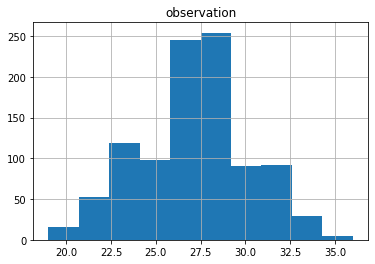

In [43]:
# your code here
data=pd.read_csv('C:/Users/Francesco M/Documents/IronHack Syllabus/Labs/Descriptive-Stats/data/ages_population2.csv', index_col=False)
data.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

Yes. this dataset has values that remain within a range 20 and 35. we can assume that maybe the average would be between 26 and 28 and we would also have a much smaller st.dev. Possibly between 1 and 3.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [44]:
# your code here
data['observation'].mean()

27.155

In [45]:
np.std(data['observation'])

2.9683286543103704

In [ ]:
"""
The assumptions made previously were correct
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

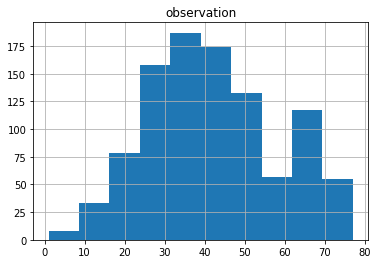

In [47]:
# your code here
data=pd.read_csv('C:/Users/Francesco M/Documents/IronHack Syllabus/Labs/Descriptive-Stats/data/ages_population3.csv', index_col=False)
data.hist()


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [48]:
# your code here
data['observation'].mean()

41.989

In [49]:
np.std(data['observation'])

16.136631587788084

In [ ]:
"""
This dataset has a similar range however the average and stdev are higher. this would suggest that the individuals observed on average are older and the data set has more variance in its age ranges.
this is also suggested based on the shape since the first is much more curved and consistent in the center as opposed to this one(we see the spike in the age range between 62 and 69).
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [54]:
# your code here
print(quar(data))
(data.median()-data.mean())


(observation    28.0
Name: 0.2, dtype: float64, observation    36.0
Name: 0.4, dtype: float64, observation    45.0
Name: 0.6, dtype: float64, observation    57.0
Name: 0.8, dtype: float64)


observation   -1.989
dtype: float64

In [ ]:
"""
we see that the average sits between the two central quantiles. calculating the difference between the med and mean shows us that the data set is more positively skewed in its distribution (also suggested
by that peak in the higher age ranges)
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [56]:
# your code here

print(data.quantile(0.5))

observation    40.0
Name: 0.5, dtype: float64


In [ ]:
"""
this is the point located in the center of the data set and shows the positioning of the mean value.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""